In [1]:
import pickle
import torch

# TAKING AMAZON DATA


# THE FOLLOWING ARE FOR WHEN SEQUENCE IS STARTED FROM SECOND VALUE NOT FIRST
gt_dt1 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/original/samples/sample_ep350_s1_num_s_7_num_steps_200/gt_dt.pt')
gt_type1 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/original/samples/sample_ep350_s1_num_s_7_num_steps_200/gt_type.pt')
samples_dt1 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/original/samples/sample_ep350_s1_num_s_7_num_steps_200/samples_dt.pt')
samples_type1 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/original/samples/sample_ep350_s1_num_s_7_num_steps_200/samples_type.pt')


# THE FOLLOWING ARE FOR WHEN SEQUENCE IS STARTED FROM FIRST VALUE ITSELF
gt_dt2 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/changed/samples/sample_ep400_s1_num_s_7_num_steps_200/gt_dt.pt')
gt_type2 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/changed/samples/sample_ep400_s1_num_s_7_num_steps_200/gt_type.pt')
samples_dt2 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/changed/samples/sample_ep400_s1_num_s_7_num_steps_200/samples_dt.pt')
samples_type2 = torch.load('./log/flow/amazon/cross_diffusion_discrete_boxcox_200_tgt_len_20/cosanneal/changed/samples/sample_ep400_s1_num_s_7_num_steps_200/samples_type.pt')

# 500 length
#print(len(gt_dt))
#print(len(samples_dt))
#print(len(gt_type))
#print(len(samples_type))

pred_type1 = torch.mode(samples_type1, dim=-1).values.long()
pred_x1 = samples_dt1.mean(dim=-1).squeeze(-1)

pred_type2 = torch.mode(samples_type2, dim=-1).values.long()
pred_x2 = samples_dt2.mean(dim=-1).squeeze(-1)

In [2]:
# Total 500
for i in range(3):

    print(f"###### FOR SEQUENCE {i+1}: ######\n")
    print("Ground truth type:\n",' '.join(str(v) for v in gt_type1[i].tolist()))
    print("Mode of predicted types in original:\n",' '.join(str(v) for v in pred_type1[i].tolist()))
    print("Mode of predicted types in changed:\n",' '.join(str(v) for v in pred_type2[i].tolist()),"\n\n")

    print("Ground truth interarrival time:\n",' '.join(f'{v:.4f}' for v in gt_dt1[i].tolist()))
    print("Mean of predicted interarrival time in original:\n",' '.join(f'{v:.4f}' for v in pred_x1[i].tolist()))
    print("Mean of predicted interarrival time in changed:\n",' '.join(f'{v:.4f}' for v in pred_x2[i].tolist()),"\n\n")

    print("Ground truth arrival time:\n",' '.join(f'{v:.4f}' for v in torch.cumsum(gt_dt1[i], dim=0).tolist()))
    print("Mean of predicted arrival time in original:\n",' '.join(f'{v:.4f}' for v in torch.cumsum(pred_x1[i], dim=0).tolist()))
    print("Mean of predicted arrival time in changed:\n",' '.join(f'{v:.4f}' for v in torch.cumsum(pred_x2[i], dim=0).tolist()),"\n\n")


    print("\n\n")

###### FOR SEQUENCE 1: ######

Ground truth type:
 3 0 1 1 1 2 0 0 1 3 0 0 1 1 1 1 1 0 1 0
Mode of predicted types in original:
 0 1 0 0 1 0 0 2 2 1 0 1 1 0 1 0 1 1 1 0
Mode of predicted types in changed:
 0 1 0 0 1 0 0 2 2 1 0 1 1 0 1 0 1 0 1 0 


Ground truth interarrival time:
 0.0150 0.7800 0.0111 0.7216 0.7597 0.0116 0.7087 0.7566 0.7359 0.0147 0.0101 0.7302 0.7453 0.7128 0.7380 0.7861 0.7488 0.7683 0.7044 0.7347
Mean of predicted interarrival time in original:
 0.7728 0.3296 0.6543 0.4441 0.4433 0.5472 0.5492 0.3389 0.5575 0.5395 0.5283 0.4327 0.6568 0.6232 0.5272 0.6431 0.7501 0.5460 0.6505 0.6151
Mean of predicted interarrival time in changed:
 0.7784 0.3310 0.6556 0.4447 0.4444 0.4446 0.5520 0.3395 0.5585 0.5417 0.5308 0.4337 0.6582 0.6247 0.5279 0.6444 0.7506 0.5470 0.6518 0.6161 


Ground truth arrival time:
 0.0150 0.7949 0.8060 1.5276 2.2873 2.2989 3.0077 3.7643 4.5002 4.5149 4.5250 5.2552 6.0005 6.7132 7.4512 8.2374 8.9862 9.7544 10.4588 11.1935
Mean of predicted arrival 

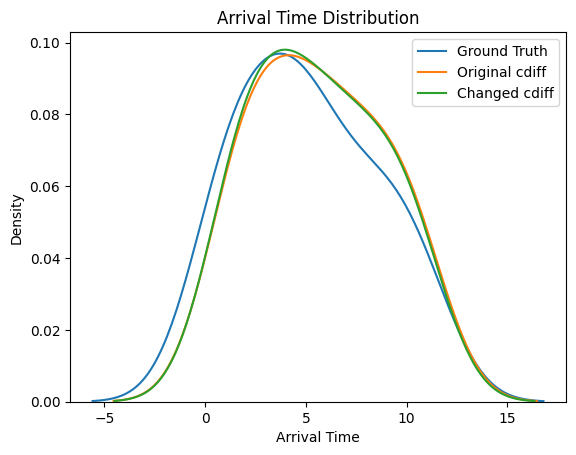

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.kdeplot(torch.cumsum(gt_dt1[0], dim=0), label='Ground Truth')
sns.kdeplot(torch.cumsum(pred_x1[0], dim=0), label='Original cdiff')
sns.kdeplot(torch.cumsum(pred_x2[0], dim=0), label='Changed cdiff')
plt.xlabel('Arrival Time')
plt.title('Arrival Time Distribution')
plt.legend()
plt.show()

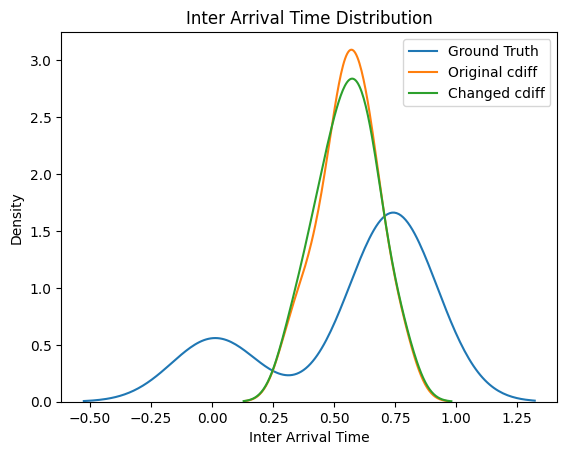

In [22]:
sns.kdeplot(gt_dt1[0], label='Ground Truth')
sns.kdeplot(pred_x1[0], label='Original cdiff')
sns.kdeplot(pred_x2[0], label='Changed cdiff')
plt.xlabel('Inter Arrival Time')
plt.title('Inter Arrival Time Distribution')
plt.legend()
plt.show()

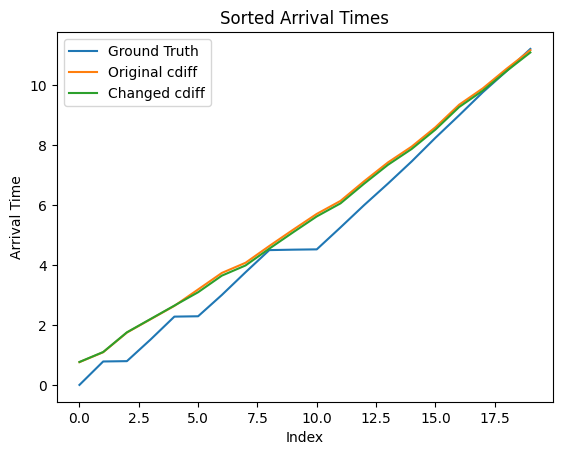

In [24]:
plt.plot(torch.cumsum(gt_dt1[0], dim=0), label='Ground Truth')
plt.plot(torch.cumsum(pred_x1[0], dim=0), label='Original cdiff')
plt.plot(torch.cumsum(pred_x2[0], dim=0), label='Changed cdiff')
plt.xlabel('Index')
plt.ylabel('Arrival Time')
plt.legend()
plt.title('Sorted Arrival Times')
plt.show()